In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("done")

done


# Dataset and Data info

In [7]:
df=pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [8]:
df.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [9]:
df.shape

(4746, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [11]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [13]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [16]:
y=df['Rent']

In [17]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [19]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

# EDA Visualization

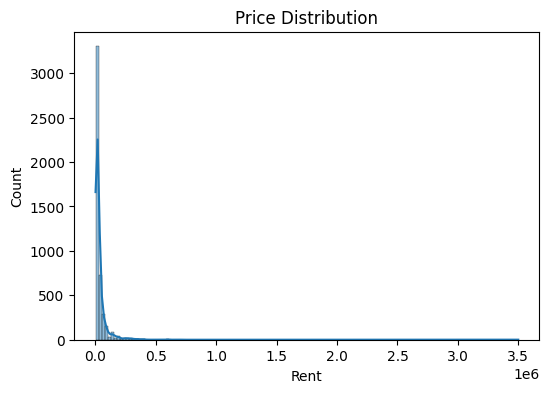

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df[y.name],kde=True)
plt.title("Price Distribution")
plt.show()

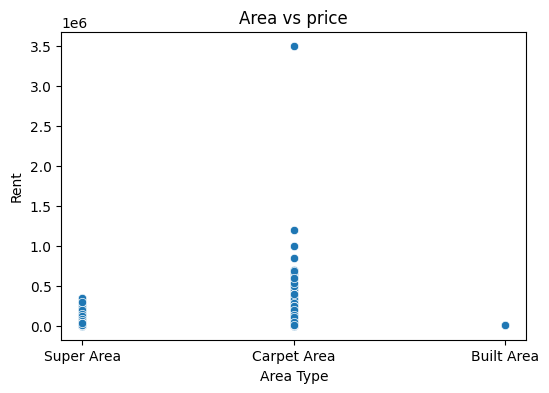

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Area Type'],y=df[y.name])
plt.title("Area vs price")
plt.show()

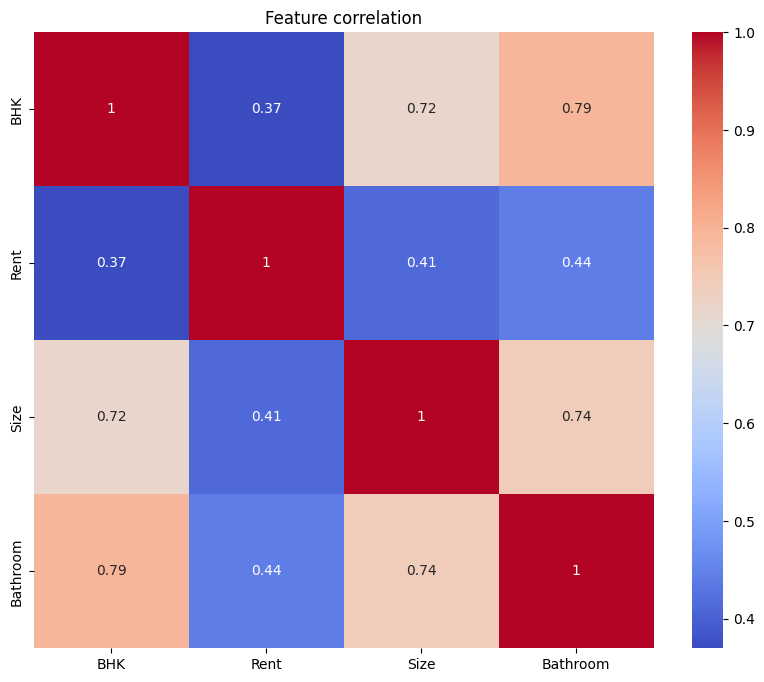

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Feature correlation")
plt.show()

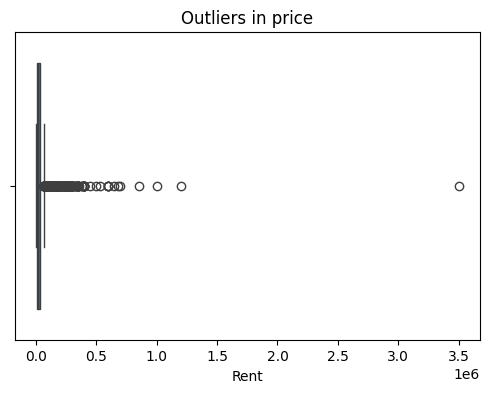

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df[y.name])
plt.title("Outliers in price")
plt.show()

In [27]:
df=pd.get_dummies(df,drop_first=True)

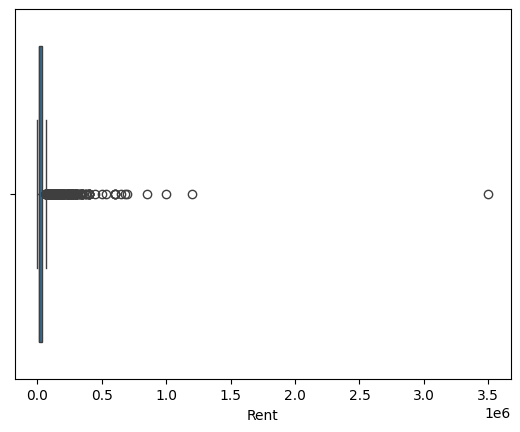

In [28]:
sns.boxplot(x=df[y.name])
plt.show()

## MODEL Training and metrics

In [31]:
X=df.drop(y.name,axis=1)
y=df[y.name]

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3796, 2809)
(950, 2809)
(3796,)
(950,)


In [34]:
lr_model=LinearRegression()

In [35]:
lr_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
y_pred=lr_model.predict(X_test)

In [39]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 SCORE:",r2)

MAE: 74540.03705503607
MSE: 15743466199.73826
RMSE: 125472.96999648275
R2 SCORE: -2.9503036088162875


## Prediction visualization

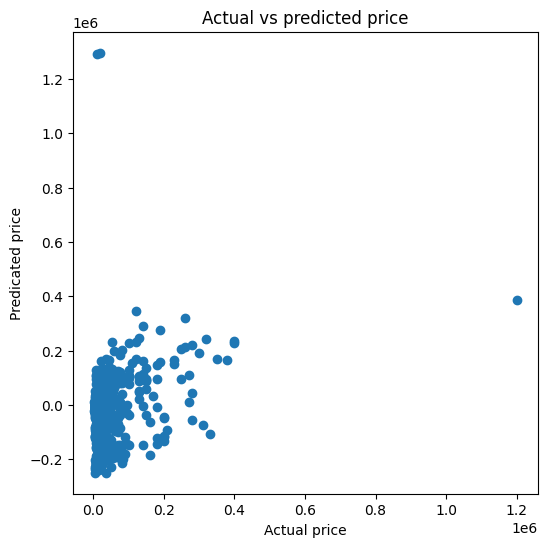

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicated price")
plt.title("Actual vs predicted price")
plt.show()

In [42]:
import pickle
with open("Home_price_model.pkl","wb")as f:
    pickle.dump(lr_model,f)
with open("home_price_model.pkl","rb")as f:
    loaded_model=pickle.load(f)

In [44]:
n=20
actual=y_test[:n].values
predicted=y_pred[:n]

In [45]:
indices=np.array(n)

ValueError: 'locs' must be 1D with shape (N,), but your input has shape ()

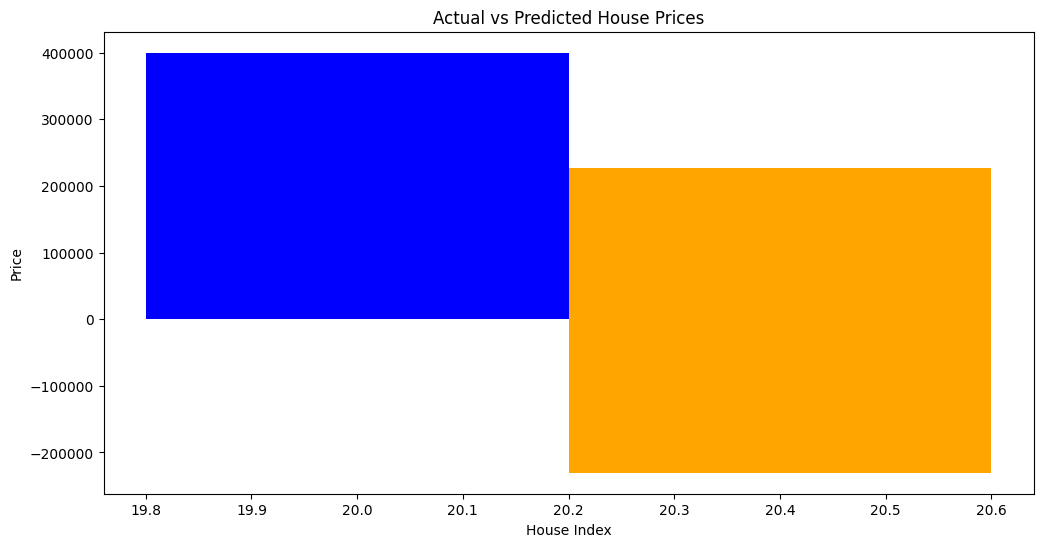

In [46]:
plt.figure(figsize=(12,6))

bar_width = 0.4

plt.bar(indices, actual, width=bar_width, label='Actual Price', color='blue')
plt.bar(indices + bar_width, predicted, width=bar_width, label='Predicted Price', color='orange')

plt.xlabel("House Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted House Prices")
plt.xticks(indices + bar_width/2, indices)  # set x-ticks in the middle
plt.legend()
plt.show()


In [47]:
import pickle

# Load the model
with open("Home_price_model.pkl", "rb") as f:  # rb = read binary
    loaded_model = pickle.load(f)

# Test it
y_pred_loaded = loaded_model.predict(X_test[:5])  # first 5 examples
print(y_pred_loaded)


[ -65319.43116214 -210770.46946895  -98058.38710075  -70560.62537354
   80841.47071498]
